In [51]:
HTML('<h1 style="text-align: center; background:white;color:black"> STELLAR OBJECT CLASSIFICATION</h1>')

##### This project aims to develop machine learning models to classify celestial objects into stars, galaxies, and quasars. This project aims to faciltate efficient automated classification, insights into distinguishing features, and optimized data processing for large-scale surveys through the predictive models, data visualizations, and a comparative analysis of various algorithms.
 

In [52]:
import pandas as pd #data manipulation
    # import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #data visualization
import joblib   
from sklearn.model_selection import train_test_split # split data for training and testing 
    # Converts categorical labels into numeric values
    # Standardizes numerical data
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")


In [53]:
#  Load data
data = pd.read_csv("star_classification.csv") 
data


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

*  Check null values

In [55]:
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

* Count Number of Class 

In [56]:
data["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

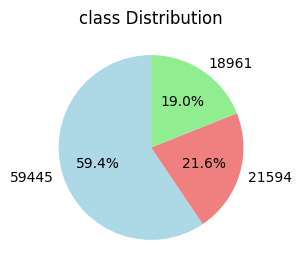

In [57]:
class_counts =data['class'].value_counts()
plt.figure(figsize=(6, 3))
plt.pie(class_counts, labels=class_counts, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'], startangle=90)
plt.title('class Distribution')
plt.show()

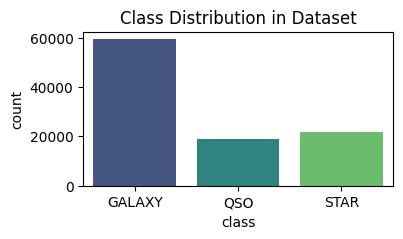

In [58]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(4, 2))
sns.countplot(x=data['class'], palette='viridis')
plt.title("Class Distribution in Dataset")
plt.show()
# visualizes the distribution of object classes (GALAXY, STAR, QSO).


<Figure size 1200x800 with 0 Axes>

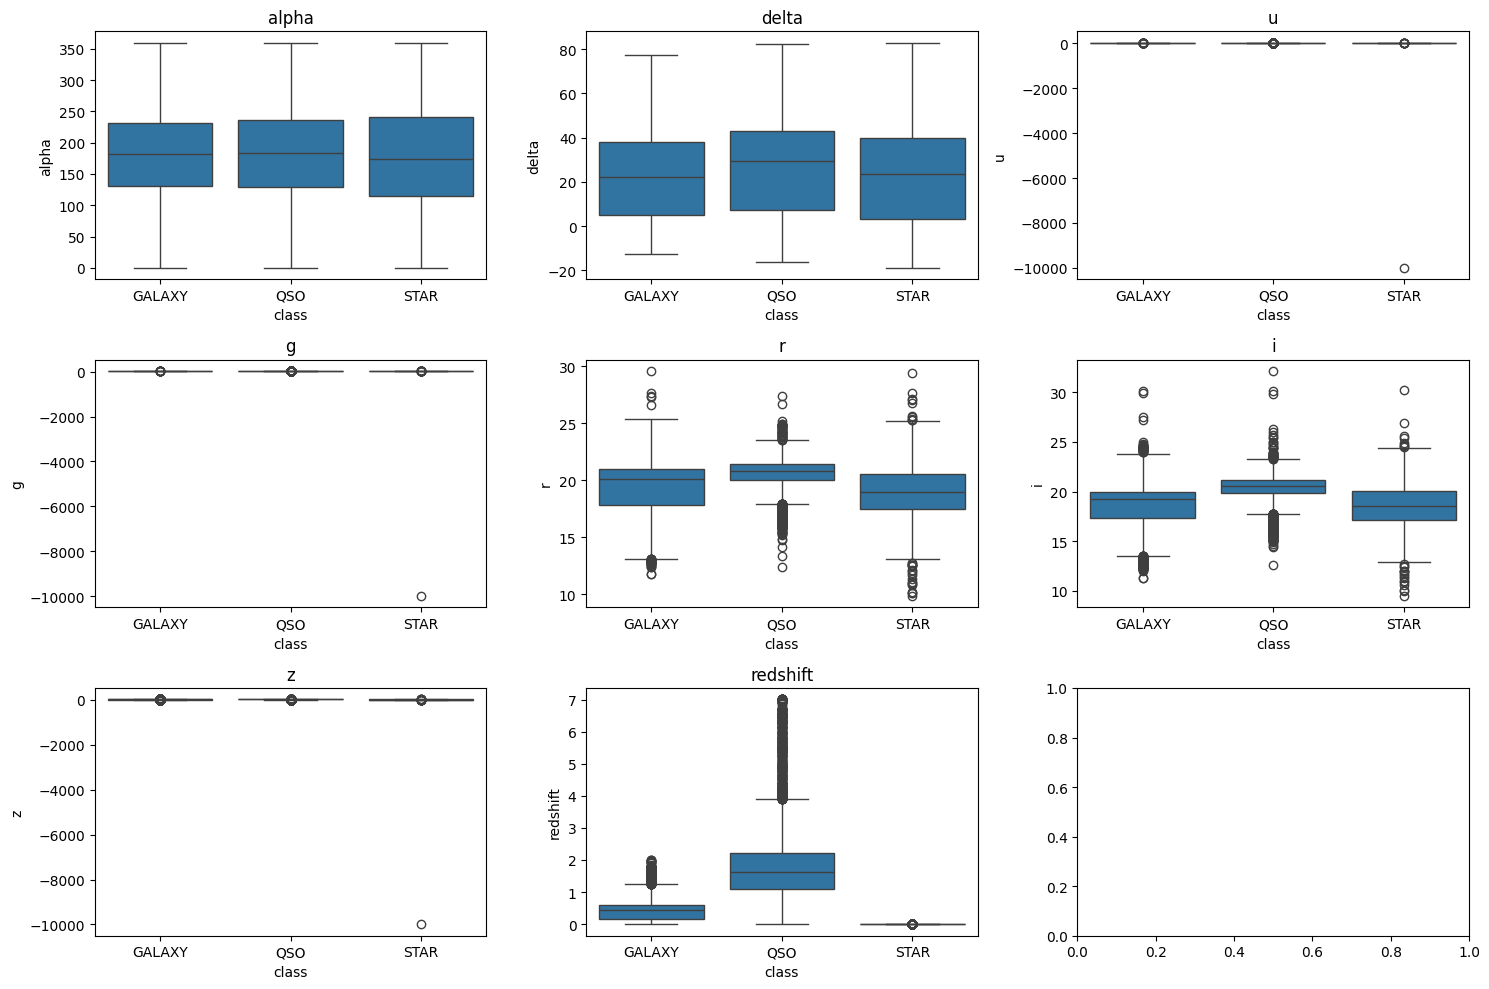

In [59]:
# box plot
features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

plt.figure(figsize=(12, 8))  # Set figure size
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Adjust grid size based on the number of features

for i, feature in enumerate(features):
    row, col = i // 3, i % 3  # Determine subplot position
    sns.boxplot(x="class", y=feature, data=data, ax=axes[row, col])  
    axes[row, col].set_title(feature)  # Set subplot title

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [60]:

# Drop unnecessary columns (MODIFIED)
data = data.drop(columns=['obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID'])

# Verify changes
print("Remaining columns:", data.columns)
# Drops irrelevant metadata columns that do not contribute to classification


Remaining columns: Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')


In [61]:
# Selecting relevant features and target variable
features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
target = 'class'
X = data[features]
y = data[target]

<!-- Converts categorical labels (GALAXY, STAR, QSO) into numeric values.
Example encoding:
GALAXY → 0
STAR → 1
QSO → 2 -->

In [62]:
# Encoding target labels
y = LabelEncoder().fit_transform(y)

In [63]:

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Splits 80% training & 20% testing data.


In [64]:
# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Uses StandardScaler to normalize features (important for SVM, KNN).

In [ ]:
# Model selection and evaluation
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9652
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17845
           1       0.92      0.91      0.91      5700
           2       1.00      1.00      1.00      6455

    accuracy                           0.97     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.97      0.97      0.97     30000

Random Forest Accuracy: 0.9775
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     17845
           1       0.97      0.92      0.94      5700
           2       0.99      1.00      1.00      6455

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000

KNN Accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     17845
           1       0.96      0.91      0.94   

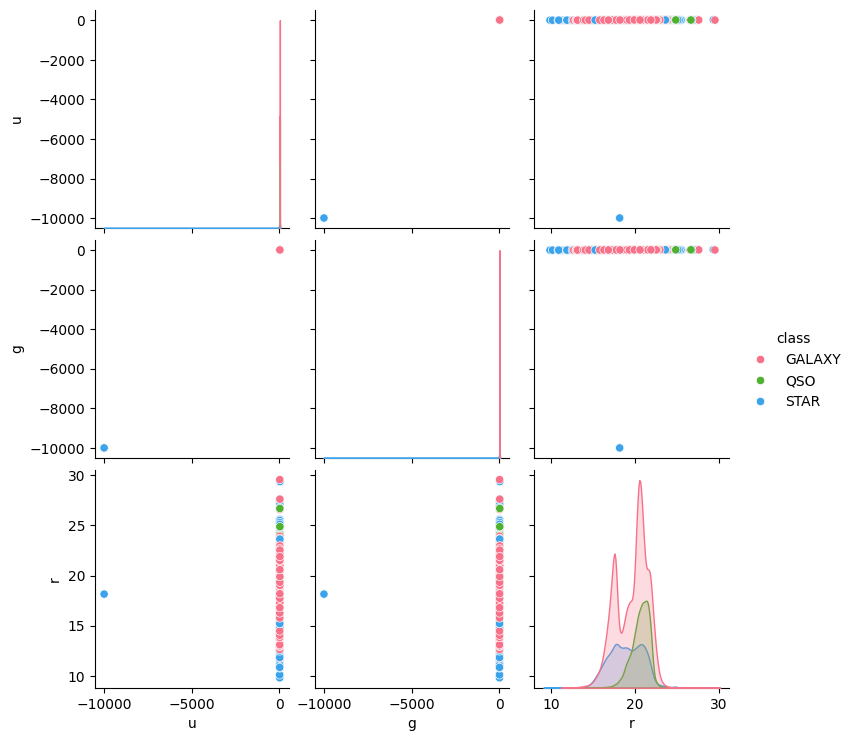

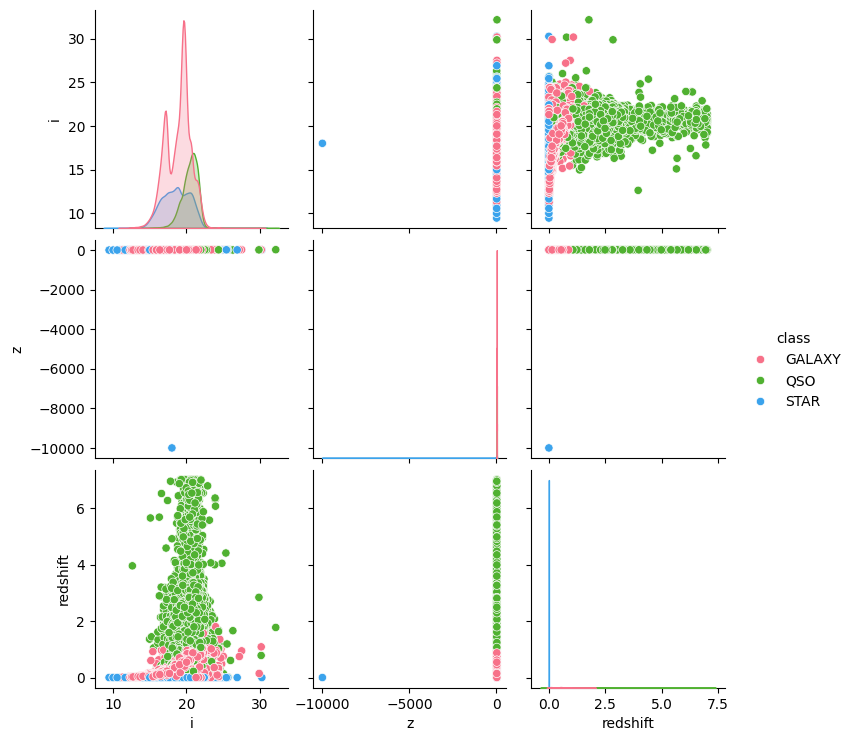

In [66]:
# Pairplot visualization
sns.pairplot(data, vars=['u', 'g', 'r'], hue='class', palette='husl')
plt.show()
sns.pairplot(data, vars=['i', 'z', 'redshift'], hue='class', palette='husl')
plt.show()

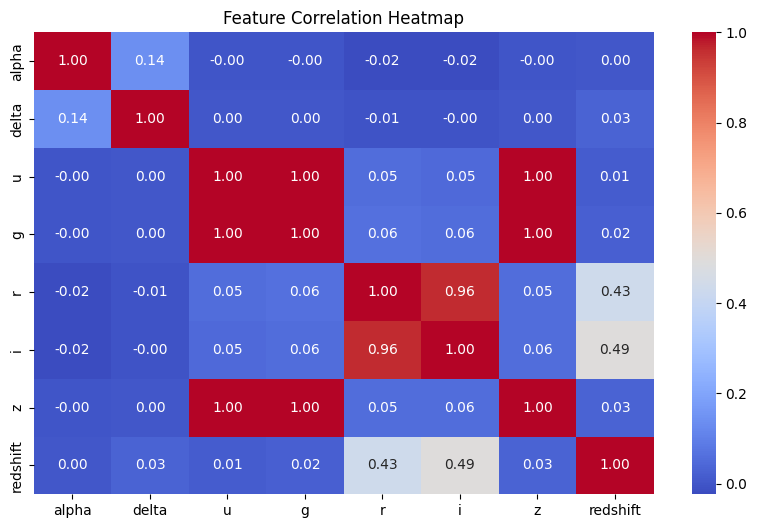

In [67]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.drop(columns=['class']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()



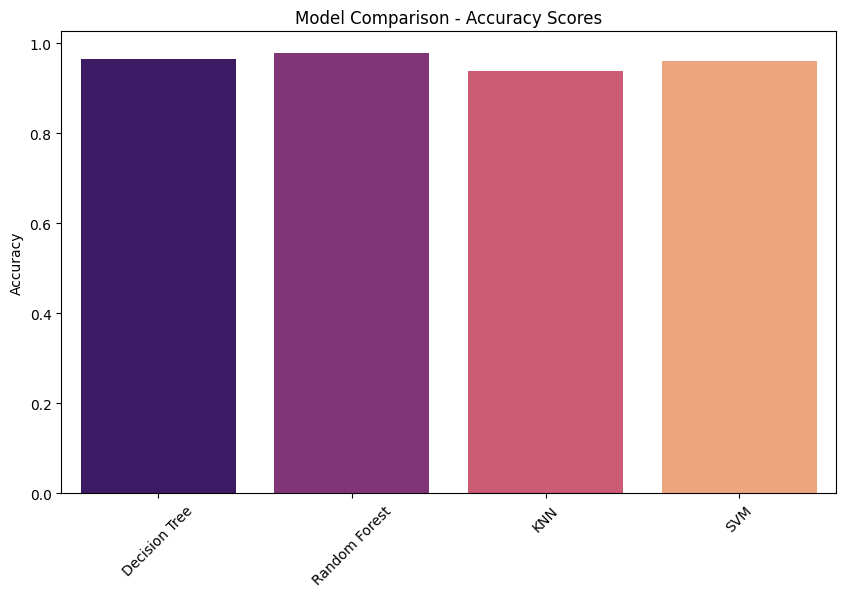

In [68]:
# Model performance comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='magma')
plt.xticks(rotation=45)
plt.title("Model Comparison - Accuracy Scores")
plt.ylabel("Accuracy")
plt.show()


In [69]:

# Assuming y_test contains true labels and y_pred contains predictions
prediction_results = pd.DataFrame({"True_Label": y_test, "Predicted_Label": y_pred})

# Save as CSV
prediction_results.to_csv("predictions.csv", index=False)

print("Predictions saved successfully!")


Predictions saved successfully!
